---

---

# Hockey Team Stats: Data Analysis & Insights Mining

## Introduction

This Jupyter notebook dedicated to the exploration, analysis, and visualization of hockey team statistics. The dataset we're about to delve into has been meticulously collected from the website [Hockey Team Stats](https://www.scrapethissite.com/), and subsequently prepared and cleaned using the data processing script [data_processor.py](../data/asdas).

Hockey enthusiasts and data aficionados alike will find this notebook a valuable resource for unearthing intriguing insights and trends within the world of hockey. Whether you're an ardent fan seeking to better understand your favorite team's performance over the years, a statistician unraveling the intricacies of sports analytics, or a sports analyst aiming to visualize data for engaging presentations, you're in the right place.

The dataset encapsulates crucial information about 35 hockey teams spanning two decades, from 1990 to 2011. Each entry reveals the wins, losses, OT losses, win percentage, goals scored, and goals conceded by a team in a given year. With this rich tapestry of data at our disposal, we're poised to embark on a journey of exploration.

Our goal is to provide you with a comprehensive analysis of hockey team statistics, ultimately uncovering the Greatest of All Time (GOAT) team through rigorous examination of their performance over time and in recent years (last five years)

## Imports & Setup

In this section, we will configure the fundamental components for data analysis and visualization in the chosen dataset.

This involves integrating popular data analysis libraries, along with key visualization libraries. We will also initialize and incorporate the dataset into the notebook as a central component.
Moreover, we will define essential configurations and options that will maintain consistency throughout the notebook.

We'll be adding some helper functions to perform similar operations neatly. [REPHRASE THIS]

### Module Import & Setup

We will be importing the following libraries and modules:

- `pandas`: For loading, manipulating, and analyzing the dataset
- `numpy`: For performing numerical operations on the dataset
- `matplotlib` and `seaborn`: For creating visualizations and plots of the data
- `sklearn.preprocessing`: For normalizing various metrics
- `warnings`: For handling any warning that may occur during the execution of the code

Additionally, we will establish and fine-tune essential configurations and settings to ensure a consistent and efficient analysis process across the entire notebook.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler

# Library Setup
pd.options.display.precision = 2
warnings.filterwarnings("ignore")

In [2]:
# Adds utils directory to Python path
import sys
sys.path.append("../")

In [3]:
# Import utility functions
from utils import hockey_da_util as hdu

### Data Import

Now, we'll proceed to load the processed hockey statistics dataset from the directory using the `pandas` library.<br>
We will employ the `read_csv()` method to retrieve the data from the CSV file. Furthermore, we'll create a deep copy of the dataframe to facilitate our work.

In [4]:
# Define the file path for the hockey team stats dataset
dataset_file_path = "../data/processed/hockey_team_stats.csv"

# Load the dataset into the main dataframe
main_df = pd.read_csv(dataset_file_path, index_col=False)

# Create a working copy of the dataframe
hockey_df  = main_df.copy(deep=True)

# Display an initial view of the dataframe
hockey_df.head()

,team_name,year,wins,losses,ot_losses,win_pct,goals_for,goals_against
0,Boston Bruins,1990,44,24,0,0.55,299,264
1,Buffalo Sabres,1990,31,30,0,0.39,292,278
2,Calgary Flames,1990,46,26,0,0.57,344,263
3,Chicago Blackhawks,1990,49,23,0,0.61,284,211
4,Detroit Red Wings,1990,34,38,0,0.42,273,298


💬 **Comment:**

As the data has been processed, the remaining concern pertains to data types. We will now verify whether the columns have the correct data types assigned.<br>
If needed, we'll proceed with the necessary data type adjustments.

In [5]:
# Check datatype of columns
hockey_df.dtypes

team_name         object
year               int64
wins               int64
losses             int64
ot_losses          int64
win_pct          float64
goals_for          int64
goals_against      int64
dtype: object

💡**Insights:**

Optimal data types for the `team_name` and `year` columns are `categorical`.<br>
Consequently, we should modify the data type of these two columns before advancing into the data analysis phase.

In [6]:
# Convert data types to "category" for specific columns
hockey_df = hockey_df.astype({"year":"category", "team_name": "category"})

# Verify the updated data types
hockey_df.dtypes

team_name        category
year             category
wins                int64
losses              int64
ot_losses           int64
win_pct           float64
goals_for           int64
goals_against       int64
dtype: object

💬 **Comment:**

Let's inspect the dataset's information to gain a comprehensive understanding of its structure, including the data types, memory usage, and the presence of missing values.<br>
This will assist us in preparing for the subsequent data analysis.

In [7]:
# Check the info
hockey_df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   team_name      582 non-null    category
 1   year           582 non-null    category
 2   wins           582 non-null    int64   
 3   losses         582 non-null    int64   
 4   ot_losses      582 non-null    int64   
 5   win_pct        582 non-null    float64 
 6   goals_for      582 non-null    int64   
 7   goals_against  582 non-null    int64   
dtypes: category(2), float64(1), int64(5)
memory usage: 32.8 KB


💡 **Insights:**

With the data properly cleaned, and data type adjustments made, our dataset is now primed for in-depth data analysis and compelling visualizations.

## Comprehensive Data Analysis

In our data analysis journey, we have outlined a series of pivotal tasks designed to unravel the nuances of hockey team statistics:

1. **Win & Win Percentage Analysis**: We'll delve into the historical and recent performance of the teams, evaluating their wins and win percentages.
2. **Loss & OT Loss Analysis**: We'll assess the teams' losses and OT losses over the same period to understand the challenges they faced.
3. **Goals Analysis**: Goals are the heart of hockey; we'll analyze the total goals scored and conceded to identify teams with strong offensive and defensive capabilities.
4. **Ranking Analysis**: We'll create rankings based on chosen metrics and compare historical and recent team rankings to find consistent performers.
5. **Trend Analysis of Top & Bottom Performers**: We'll track the trends of top and bottom-performing teams, highlighting their historical and recent performance to determine the GOAT team.

In the pursuit of our analysis, we recognize the need for specific calculated columns to enrich our insights:

- **Total Losses**: This column represents the summation of regular losses and overtime losses, providing a comprehensive view of a team's struggles.
- **OT Loss Percentage**: This metric is calculated as the percentage of overtime losses out of the total losses, and it serves as an indicator of teams that frequently engage in extended matches to ultimately lose the game.
- **Goal Differential**: This column showcases the disparity between goals scored and goals conceded. It serves as a key factor in categorizing teams as either offensive powerhouses or stalwart defensive units.

To ensure our analyses encapsulate both the broader historical context and the specific dynamics of the past five years, we will construct a dedicated sub-dataframe that captures the essence of recent performances. This strategic approach amplifies the depth and relevance of our insights, providing a holistic understanding of the intricate world of hockey team statistics.


In [8]:
# Add calculated columns to the dataframe
hockey_df = hockey_df.assign(
    total_losses = hockey_df["losses"] + hockey_df["ot_losses"],
    ot_loss_to_loss_ratio = hockey_df["ot_losses"] / hockey_df["losses"],
    loss_to_win_ratio = hockey_df["losses"] / hockey_df["wins"],
    goals_diff = hockey_df["goals_for"] - hockey_df["goals_against"]
)

# View the dataframe
hockey_df.head()

,team_name,year,wins,losses,ot_losses,win_pct,goals_for,goals_against,total_losses,ot_loss_to_loss_ratio,loss_to_win_ratio,goals_diff
0,Boston Bruins,1990,44,24,0,0.55,299,264,24,0.0,0.55,35
1,Buffalo Sabres,1990,31,30,0,0.39,292,278,30,0.0,0.97,14
2,Calgary Flames,1990,46,26,0,0.57,344,263,26,0.0,0.57,81
3,Chicago Blackhawks,1990,49,23,0,0.61,284,211,23,0.0,0.47,73
4,Detroit Red Wings,1990,34,38,0,0.42,273,298,38,0.0,1.12,-25


In [9]:
# Get last five years
lfy = sorted(hockey_df["year"].unique(), reverse=True)[:5]
lfy

[2011, 2010, 2009, 2008, 2007]

In [10]:
# Use last five years filter to create sub-dataframe
hockey_df_lfy = hockey_df[hockey_df["year"].isin(lfy)].reset_index(drop=True)

# View a glimpse of the sub-dataframe
hockey_df_lfy.head()

,team_name,year,wins,losses,ot_losses,win_pct,goals_for,goals_against,total_losses,ot_loss_to_loss_ratio,loss_to_win_ratio,goals_diff
0,Anaheim Ducks,2007,47,27,8,0.57,205,191,35,0.30,0.57,14
1,Atlanta Thrashers,2007,34,40,8,0.41,216,272,48,0.20,1.18,-56
2,Boston Bruins,2007,41,29,12,0.50,212,222,41,0.41,0.71,-10
3,Buffalo Sabres,2007,39,31,12,0.48,255,242,43,0.39,0.79,13
4,Calgary Flames,2007,42,30,10,0.51,229,227,40,0.33,0.71,2


💬**Comment:**

We now have two distinct dataframes for our analysis: 
- `hockey_df`: Encompassing the entire dataset
- `hockey_df_lfy`: Tailored to assess performance within the last five years.

### Win & Win Percentage Analysis

In [11]:
# Get all time top-5 teams by total wins
wins_t5 =  hdu.top_n_teams(hockey_df, "wins", "sum", 5).rename(columns={"team_name": "Team Name", "wins": "Total Wins"})

# Get last 5 years top-5 teams by total wins
wins_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "wins", "sum", 5).rename(columns={"team_name": "Team Name", "wins": "Total Wins (LFY)"})

print("\n")
hdu.pretty_print_topn_df(wins_t5, title="All Time Top 5 Teams by Wins")
print("\n")
hdu.pretty_print_topn_df(wins_t5_lfy, title="Last 5 Years Top 5 Teams by Wins")

        All Time Top 5 Teams by Wins        
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Index ┃ Team Name           ┃ Total Wins ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 0     │ Detroit Red Wings   │ 986        │
│ 1     │ New Jersey Devils   │ 905        │
│ 2     │ Pittsburgh Penguins │ 839        │
│ 3     │ Philadelphia Flyers │ 836        │
│ 4     │ Boston Bruins       │ 816        │
└───────┴─────────────────────┴────────────┘

         Last 5 Years Top 5 Teams by Wins         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name           ┃ Total Wins (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ 0     │ Detroit Red Wings   │ 244              │
│ 1     │ San Jose Sharks     │ 244              │
│ 2     │ Pittsburgh Penguins │ 239              │
│ 3     │ Vancouver Canucks   │ 238              │
│ 4     │ Washington Capitals │ 237              │
└───────┴─────────────────────┴──────────────────┘

In [12]:
# Get all time top-5 teams by avergae wins
avg_wins_t5 =  hdu.top_n_teams(hockey_df, "wins", "mean", 5).rename(columns={"team_name": "Team Name", "wins": "Average Wins"})
avg_wins_t5["Average Wins"] = avg_wins_t5["Average Wins"].round(2)

# Get last 5 years top-5 teams by average wins
avg_wins_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "wins", "mean", 5).rename(columns={"team_name": "Team Name", "wins": "Average Wins (LFY)"})
avg_wins_t5_lfy["Average Wins (LFY)"] = avg_wins_t5_lfy["Average Wins (LFY)"].round(2)

print("\n")
hdu.pretty_print_topn_df(avg_wins_t5, title="All Time Top 5 Teams by Average Wins")
print("\n")
hdu.pretty_print_topn_df(avg_wins_t5_lfy, title="Last 5 Years Top 5 Teams by Average Wins")

    All Time Top 5 Teams by Average Wins     
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name          ┃ Average Wins ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ 0     │ Detroit Red Wings  │ 46.95        │
│ 1     │ New Jersey Devils  │ 43.1         │
│ 2     │ Anaheim Ducks      │ 42.83        │
│ 3     │ Colorado Avalanche │ 42.31        │
│ 4     │ Dallas Stars       │ 41.78        │
└───────┴────────────────────┴──────────────┘

      Last 5 Years Top 5 Teams by Average Wins      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name           ┃ Average Wins (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Detroit Red Wings   │ 48.8               │
│ 1     │ San Jose Sharks     │ 48.8               │
│ 2     │ Pittsburgh Penguins │ 47.8               │
│ 3     │ Vancouver Canucks   │ 47.6               │
│ 4     │ Washington Capitals │ 47.4               │
└───────┴─────────────────────┴────────────────────┘

In [13]:
# Get all time top-5 teams by avergae win %
avg_winpct_t5 =  hdu.top_n_teams(hockey_df, "win_pct", "mean", 5).rename(columns={"team_name": "Team Name", "win_pct": "Average Win%"})
avg_winpct_t5["Average Win%"] = avg_winpct_t5["Average Win%"].round(2)

# Get last 5 years top-5 teams by average win %
avg_winpct_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "win_pct", "mean", 5).rename(columns={"team_name": "Team Name", "win_pct": "Average Win% (LFY)"})
avg_winpct_t5_lfy["Average Win% (LFY)"] = avg_winpct_t5_lfy["Average Win% (LFY)"].round(2)

print("\n")
hdu.pretty_print_topn_df(avg_winpct_t5, title="All Time Top 5 Teams by Average Win%")
print("\n")
hdu.pretty_print_topn_df(avg_winpct_t5_lfy, title="Last 5 Years Top 5 Teams by Average Win%")

    All Time Top 5 Teams by Average Win%     
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name          ┃ Average Win% ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ 0     │ Detroit Red Wings  │ 0.59         │
│ 1     │ New Jersey Devils  │ 0.53         │
│ 2     │ Anaheim Ducks      │ 0.52         │
│ 3     │ Dallas Stars       │ 0.52         │
│ 4     │ Colorado Avalanche │ 0.52         │
└───────┴────────────────────┴──────────────┘

      Last 5 Years Top 5 Teams by Average Win%      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name           ┃ Average Win% (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Detroit Red Wings   │ 0.6                │
│ 1     │ San Jose Sharks     │ 0.6                │
│ 2     │ Pittsburgh Penguins │ 0.58               │
│ 3     │ Vancouver Canucks   │ 0.58               │
│ 4     │ Washington Capitals │ 0.58               │
└───────┴─────────────────────┴────────────────────┘

#### Win & Win Percentage Analysis Plot

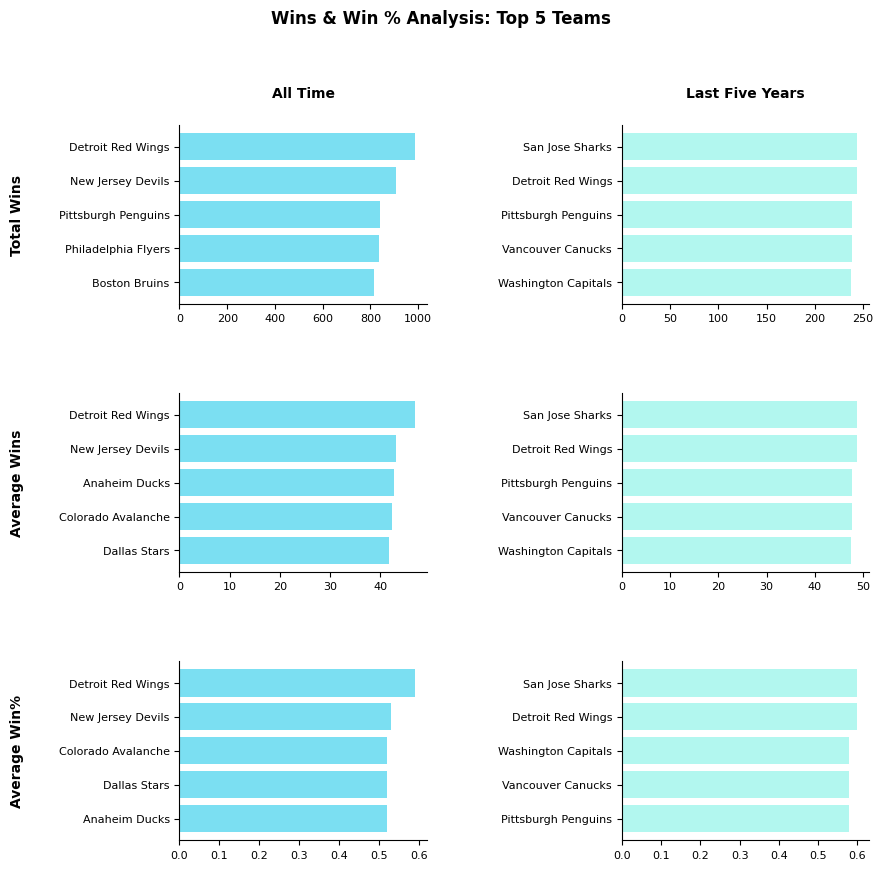

In [14]:
# Plot styling
plt.style.use("seaborn-pastel")

# Dataframes for various metrics
dataframes = [
    wins_t5.sort_values(by='Total Wins', ascending=True),
    wins_t5_lfy.sort_values(by='Total Wins (LFY)', ascending=True),
    avg_wins_t5.sort_values(by='Average Wins', ascending=True),
    avg_wins_t5_lfy.sort_values(by='Average Wins (LFY)', ascending=True),
    avg_winpct_t5.sort_values(by='Average Win%', ascending=True),
    avg_winpct_t5_lfy.sort_values(by='Average Win% (LFY)', ascending=True)
]

# Create figure and axes
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

# Set different colors for specific plots
colors = ["#7bdff2", "#b2f7ef","#7bdff2", "#b2f7ef", "#7bdff2", "#b2f7ef"]

# Loop to create and customize the subplots
for i, (df, color, ax) in enumerate(zip(dataframes, colors, axes)):
    ax.barh(df['Team Name'], df[df.columns[-1]], color=color)
    if i == 0:
        ax.set_title("All Time", fontweight="bold", pad=20, fontsize=10)
        ax.set_ylabel("Total Wins", fontweight="bold", labelpad=25, fontsize=10)
    if i == 1:
        ax.set_title("Last Five Years", fontweight="bold", pad=20, fontsize=10)
        
    if i == 2:
        ax.set_ylabel("Average Wins", fontweight="bold", labelpad=25, fontsize=10)
    if i == 4:
        ax.set_ylabel("Average Win%", fontweight="bold", labelpad=25, fontsize=10)
        
        
    
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=8)
    

sns.despine()

# Add figure title
fig.suptitle(f'Wins & Win % Analysis: Top 5 Teams', fontweight="bold", y=0.92, x=0.5)

# Subplot gaps and layout management
fig.tight_layout(pad=5)

# Show plot
plt.show()


#### Top-3 Teams by Weighted Win Score

Since the teams are differing in all time and last five year comparision and we are also comparing on the basis of total wins, average wins and average win percentage, a better metric to get an idea of which are top-3 that outperformed others would be finding a "weight score" by normalizing the metrics.

In order to find the weighted score, we need to provide more weightage to recent year, i.e., last 5 years metric and the weights for different conlumns are as follows:

| Column Name        | Weightage |
|--------------------|-----------|
| Average Win% (LFY) | 0.35      |
| Average Wins (LFY) | 0.25      |
| Total Wins (LFY)   | 0.15      |
| Average Win%       | 0.12      |
| Average Wins       | 0.08      |
| Total Wins         | 0.05      |



In [15]:
# Create scalar object
scaler = MinMaxScaler()

# Concatenating Dataframes
df_list = [wins_t5, wins_t5_lfy, avg_wins_t5, avg_wins_t5_lfy, avg_winpct_t5, avg_winpct_t5_lfy]
combined_df = pd.concat([df.set_index("Team Name") for df in df_list], axis=1, join='outer').reset_index()

# Specify the columns you want to scale
columns_to_scale = combined_df.drop(columns="Team Name").columns

# Fill NaN with zeros
combined_df[columns_to_scale] = combined_df[columns_to_scale].fillna(0)

# Fit and transform the selected columns using the scaler
combined_df[columns_to_scale] = scaler.fit_transform(combined_df[columns_to_scale])

# Calculating "weighted_score"
combined_df["weighted_score"] = (combined_df["Average Win% (LFY)"] * 0.35 + combined_df["Average Wins (LFY)"] * 0.25 
                         + combined_df["Total Wins (LFY)"] * 0.15 + combined_df["Average Win%"]*0.12 + combined_df["Average Wins"]*0.08 + combined_df["Total Wins"]*0.05) * 100

# Grouping data and take the top-3
win_score_df = hdu.top_n_teams(combined_df.rename(columns={"Team Name":"team_name"}), "weighted_score", agg_func="sum", n=3)

# View the data
win_score_df

,team_name,weighted_score
0,Detroit Red Wings,100.00
1,Pittsburgh Penguins,77.27
2,San Jose Sharks,75.00


Without a doubt, **Detroit Red Wings** firmly establishes their status as the Greatest of All Time (G.O.A.T) in the world of hockey.

However, it's worth noting that teams like the **San Jose Sharks** and the **Pittsburgh Penguins** are poised to emerge as formidable competitors, challenging the long-standing dominance of **Detroit Red Wings**.<br>
Here goes the logo for the Top-3 winners:

![Detroit Red Wings Logo](https://a.espncdn.com/combiner/i?img=/i/teamlogos/nhl/500/det.png&h=90&w=90)<br>
**Detroit Red Wings - G.O.A.T 🐐**

![Pittsburgh Penguins Logo](https://a.espncdn.com/combiner/i?img=/i/teamlogos/nhl/500/pit.png&h=90&w=90)<br>
**Pittsburgh Penguins**

![San Jose Sharks Logo](https://a.espncdn.com/combiner/i?img=/i/teamlogos/nhl/500/sj.png&h=90&w=90)<br>
**San Jose Sharks**

### Loss & OT Loss Analysis

In [16]:
# Get all time top-5 teams by total losses
losses_t5 =  hdu.top_n_teams(hockey_df, "losses", "sum", 5).rename(columns={"team_name": "Team Name", "losses": "Total Losses"})

# Get last 5 years top-5 teams by total losses
losses_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "losses", "sum", 5).rename(columns={"team_name": "Team Name", "losses": "Total Losses (LFY)"})

print("\n")
hdu.pretty_print_topn_df(losses_t5, title="All Time Top 5 Teams by Losses")
print("\n")
hdu.pretty_print_topn_df(losses_t5_lfy, title="Last 5 Years Top 5 Teams by Losses")

        All Time Top 5 Teams by Losses        
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name           ┃ Total Losses ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ 0     │ New York Islanders  │ 819          │
│ 1     │ Edmonton Oilers     │ 758          │
│ 2     │ Tampa Bay Lightning │ 732          │
│ 3     │ Los Angeles Kings   │ 707          │
│ 4     │ Toronto Maple Leafs │ 695          │
└───────┴─────────────────────┴──────────────┘

          Last 5 Years Top 5 Teams by Losses          
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Total Losses (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Edmonton Oilers       │ 202                │
│ 1     │ New York Islanders    │ 198                │
│ 2     │ Colorado Avalanche    │ 185                │
│ 3     │ Columbus Blue Jackets │ 183                │
│ 4     │ Tampa Bay Lightning   │ 179                │
└───────┴───────────────────────┴────────────────────┘

In [17]:
# Get all time top-5 teams by total losses
avg_losses_t5 =  hdu.top_n_teams(hockey_df, "losses", "mean", 5).rename(columns={"team_name": "Team Name", "losses": "Average Losses"}).round(2)

# Get last 5 years top-5 teams by total losses
avg_losses_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "losses", "mean", 5).rename(columns={"team_name": "Team Name", "losses": "Average Losses (LFY)"}).round(2)

print("\n")
hdu.pretty_print_topn_df(avg_losses_t5, title="All Time Top 5 Teams by Average Losses")
print("\n")
hdu.pretty_print_topn_df(avg_losses_t5_lfy, title="Last 5 Years Top 5 Teams by Average Losses")

      All Time Top 5 Teams by Average Losses      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Average Losses ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ 0     │ Hartford Whalers      │ 40.14          │
│ 1     │ Columbus Blue Jackets │ 40.09          │
│ 2     │ Atlanta Thrashers     │ 39.73          │
│ 3     │ Minnesota North Stars │ 39.67          │
│ 4     │ New York Islanders    │ 39.0           │
└───────┴───────────────────────┴────────────────┘

       Last 5 Years Top 5 Teams by Average Losses       
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Average Losses (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Edmonton Oilers       │ 40.4                 │
│ 1     │ New York Islanders    │ 39.6                 │
│ 2     │ Atlanta Thrashers     │ 37.75                │
│ 3     │ Colorado Avalanche    │ 37.0                 │
│ 4     │ Columbus Blue Jackets │ 36.6                 │
└───────┴───────────────────────┴──────────────────────┘

In [18]:
# Get all time top-5 teams by total losses
ot_losses_t5 =  hdu.top_n_teams(hockey_df, "ot_losses", "sum", 5).rename(columns={"team_name": "Team Name", "ot_losses": "Total OT Losses"})

# Get last 5 years top-5 teams by total losses
ot_losses_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "ot_losses", "sum", 5).rename(columns={"team_name": "Team Name", "ot_losses": "Total OT Losses (LFY)"})

print("\n")
hdu.pretty_print_topn_df(ot_losses_t5, title="All Time Top 5 Teams by Total OT Losses")
print("\n")
hdu.pretty_print_topn_df(ot_losses_t5_lfy, title="Last 5 Years Top 5 Teams by Total OT Losses")

     All Time Top 5 Teams by Total OT Losses     
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name           ┃ Total OT Losses ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 0     │ Florida Panthers    │ 124             │
│ 1     │ Boston Bruins       │ 106             │
│ 2     │ St. Louis Blues     │ 101             │
│ 3     │ Montreal Canadiens  │ 96              │
│ 4     │ Tampa Bay Lightning │ 96              │
└───────┴─────────────────────┴─────────────────┘

       Last 5 Years Top 5 Teams by Total OT Losses       
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Total OT Losses (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Florida Panthers      │ 63                    │
│ 1     │ Toronto Maple Leafs   │ 59                    │
│ 2     │ Tampa Bay Lightning   │ 58                    │
│ 3     │ Columbus Blue Jackets │ 57                    │
│ 4     │ Montreal Canadiens    │ 55                    │
└───────┴───────────────────────┴───────────────────────┘

In [19]:
# Get all time top-5 teams by total losses
avg_ot_losses_t5 =  hdu.top_n_teams(hockey_df, "ot_losses", "mean", 5).rename(columns={"team_name": "Team Name", "ot_losses": "Average OT Losses"}).round(2)

# Get last 5 years top-5 teams by total losses
avg_ot_losses_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "ot_losses", "mean", 5).rename(columns={"team_name": "Team Name", "ot_losses": "Average OT Losses (LFY)"}).round(2)

print("\n")
hdu.pretty_print_topn_df(avg_ot_losses_t5, title="All Time Top 5 Teams by Average OT Losses")
print("\n")
hdu.pretty_print_topn_df(avg_ot_losses_t5_lfy, title="Last 5 Years Top 5 Teams by Average OT Losses")

      All Time Top 5 Teams by Average OT Losses      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Average OT Losses ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Anaheim Ducks         │ 9.5               │
│ 1     │ Columbus Blue Jackets │ 7.82              │
│ 2     │ Minnesota Wild        │ 7.27              │
│ 3     │ Atlanta Thrashers     │ 7.09              │
│ 4     │ Florida Panthers      │ 6.89              │
└───────┴───────────────────────┴───────────────────┘

       Last 5 Years Top 5 Teams by Average OT Losses       
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Average OT Losses (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Florida Panthers      │ 12.6                    │
│ 1     │ Toronto Maple Leafs   │ 11.8                    │
│ 2     │ Tampa Bay Lightning   │ 11.6                    │
│ 3     │ Columbus Blue Jackets │ 11.4                    │
│ 4     │ Montreal Canadiens    │ 11.0                    │
└───────┴───────────────────────┴─────────────────────────┘

In [20]:
# Get all time top-5 teams by total losses
ot_loss_to_loss_t5 =  hdu.top_n_teams(hockey_df, "ot_loss_to_loss_ratio", "mean", 5).rename(columns={"team_name": "Team Name", "ot_loss_to_loss_ratio": "Average OT Losses to Losses Ratio"}).round(2)

# Get last 5 years top-5 teams by total losses
ot_loss_to_loss_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "ot_loss_to_loss_ratio", "mean", 5).rename(columns={"team_name": "Team Name", "ot_loss_to_loss_ratio": "Average OT Losses to Losses Ratio (LFY)"}).round(2)

print("\n")
hdu.pretty_print_topn_df(ot_loss_to_loss_t5, title="All Time Top 5 Teams by Average OT Losses to Losses Ratio")
print("\n")
hdu.pretty_print_topn_df(ot_loss_to_loss_t5_lfy, title="Last 5 Years Top 5 Teams by Average OT Losses to Losses Ratio")

      All Time Top 5 Teams by Average OT Losses to Losses Ratio      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Average OT Losses to Losses Ratio ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Anaheim Ducks         │ 0.34                              │
│ 1     │ Minnesota Wild        │ 0.22                              │
│ 2     │ Florida Panthers      │ 0.21                              │
│ 3     │ Columbus Blue Jackets │ 0.21                              │
│ 4     │ Nashville Predators   │ 0.21                              │
└───────┴───────────────────────┴───────────────────────────────────┘

      Last 5 Years Top 5 Teams by Average OT Losses to Losses Ratio      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name           ┃ Average OT Losses to Losses Ratio (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ San Jose Sharks     │ 0.46                                    │
│ 1     │ Washington Capitals │ 0.44                                    │
│ 2     │ Detroit Red Wings   │ 0.4                                     │
│ 3     │ Florida Panthers    │ 0.39                                    │
│ 4     │ Boston Bruins       │ 0.39                                    │
└───────┴─────────────────────┴─────────────────────────────────────────┘

In [21]:
# Get all time top-5 teams by total losses
loss_to_win_t5 =  hdu.top_n_teams(hockey_df, "loss_to_win_ratio", "mean", 5).rename(columns={"team_name": "Team Name", "loss_to_win_ratio": "Loss to Win Ratio"}).round(2)

# Get last 5 years top-5 teams by total losses
loss_to_win_t5_lfy = hdu.top_n_teams(hockey_df_lfy, "loss_to_win_ratio", "mean", 5).rename(columns={"team_name": "Team Name", "loss_to_win_ratio": "Loss to Win Ratio (LFY)"}).round(2)

print("\n")
hdu.pretty_print_topn_df(loss_to_win_t5, title="All Time Top 5 Teams by Average Loss to Win Ratio")
print("\n")
hdu.pretty_print_topn_df(loss_to_win_t5_lfy, title="Last 5 Years Top 5 Teams by Average Loss to Win Ratio")

 All Time Top 5 Teams by Average Loss to Win Ratio 
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name           ┃ Loss to Win Ratio ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Quebec Nordiques    │ 1.55              │
│ 1     │ Ottawa Senators     │ 1.54              │
│ 2     │ Atlanta Thrashers   │ 1.52              │
│ 3     │ Tampa Bay Lightning │ 1.46              │
│ 4     │ Hartford Whalers    │ 1.46              │
└───────┴─────────────────────┴───────────────────┘

   Last 5 Years Top 5 Teams by Average Loss to Win Ratio   
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Loss to Win Ratio (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ Edmonton Oilers       │ 1.31                    │
│ 1     │ New York Islanders    │ 1.27                    │
│ 2     │ Tampa Bay Lightning   │ 1.11                    │
│ 3     │ Columbus Blue Jackets │ 1.1                     │
│ 4     │ Atlanta Thrashers     │ 1.09                    │
└───────┴───────────────────────┴─────────────────────────┘

In [22]:
# Get all time top-5 teams by total wins
wins_b5 =  hdu.bottom_n_teams(hockey_df, "wins", "sum", 5).rename(columns={"team_name": "Team Name", "wins": "Total Wins"})

# Get last 5 years top-5 teams by total wins
wins_b5_lfy = hdu.bottom_n_teams(hockey_df_lfy, "wins", "sum", 5).rename(columns={"team_name": "Team Name", "wins": "Total Wins (LFY)"})

print("\n")
hdu.pretty_print_topn_df(wins_b5, title="All Time Bottom 5 Teams by Wins")
print("\n")
hdu.pretty_print_topn_df(wins_b5_lfy, title="Last 5 Years Bottom 5 Teams by Wins")

       All Time Bottom 5 Teams by Wins        
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Index ┃ Team Name             ┃ Total Wins ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 0     │ Minnesota North Stars │ 95         │
│ 1     │ Quebec Nordiques      │ 147        │
│ 2     │ Hartford Whalers      │ 195        │
│ 3     │ Winnipeg Jets         │ 212        │
│ 4     │ Anaheim Ducks         │ 257        │
└───────┴───────────────────────┴────────────┘

         Last 5 Years Bottom 5 Teams by Wins          
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Team Name               ┃ Total Wins (LFY) ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ 0     │ Hartford Whalers        │ 0                │
│ 1     │ Mighty Ducks of Anaheim │ 0                │
│ 2     │ Minnesota North Stars   │ 0                │
│ 3     │ Quebec Nordiques        │ 0                │
│ 4     │ Winnipeg Jets           │ 37               │
└───────┴─────────────────────────┴──────────────────┘

#### Losses & OT Losses Analysis Plot

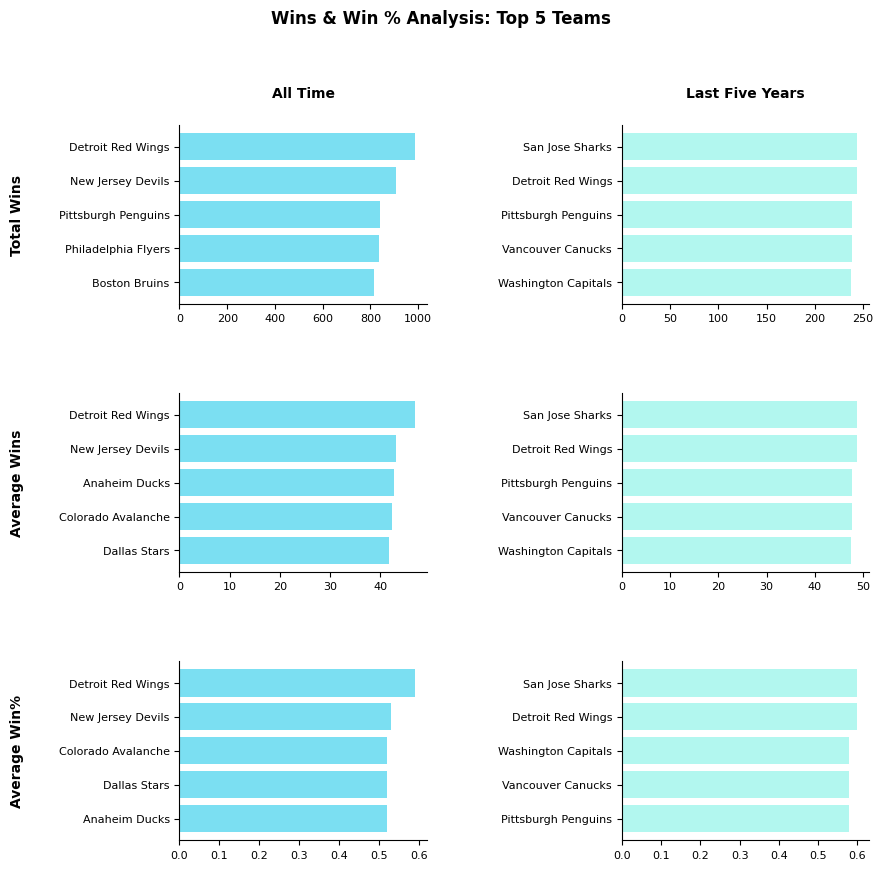